In [1]:
import re 
import tweepy 
from tweepy import OAuthHandler
import pandas as pd
import numpy as np

In [2]:
consumer_key = 'kGR5GYd09tSmQCJeyprOKlKeV'
consumer_secret = 'MNeyyl0SkUOGgkIs8kDdZktPi2HCxC7mTv6re4GywsiarZDR3c'
access_token = '1089903781880434688-SDhXR2aBBr54lZQ8QnPaE4mUR6TrOd'
access_token_secret = 'D6wHvFEmbL3W0FSP70jxBRpIYs53UGxuQlQ5yHf578ZDt'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
auth.set_access_token(access_token, access_token_secret) 

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
def clean_tweet(tweet): 

    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(?:^|\W)rt(?:$|\W)", " ", str(tweet)).split()) 

In [4]:
tweets = []

search_terms = 'Matteo Salvini OR lega OR #salvini OR #lega OR @matteosalvinimi OR #primaglitaliani OR #capitanosalvini'

# call twitter api to fetch tweets 
fetched_tweets = api.search(q = search_terms, lang = 'it', count = 100, tweet_mode='extended') 

# parsing tweets one by one 
for tweet in fetched_tweets: 
    # empty dictionary to store required params of a tweet 
    parsed_tweet = {} 

    # saving text of tweet 
    parsed_tweet['text'] = tweet.full_text
    parsed_tweet['author'] = tweet.author.id    # saving sentiment of tweet 
#     parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

    # appending parsed tweet to tweets list 
    if tweet.retweet_count > 0: 
        # if tweet has retweets, ensure that it is appended only once 
        if parsed_tweet not in tweets: 
            tweets.append(parsed_tweet)
    else: 
        tweets.append(parsed_tweet) 

In [5]:
tweets_final=pd.DataFrame(tweets)

In [6]:
tweets_final

,author,text
0,1166038916149010432,@Nicola86492086 @matteosalvinimi Perché non la...
1,319578825,@serracchiani @pdnetwork eccoli che fanno i #L...
2,1082984088,RT @SenatoreF: La lecchinata \n@libero_officia...
3,1082984088,La lecchinata \n@libero_official\n#PDM5S \n#Co...
4,795243203104538624,@matteosalvinimi È presto x rispondere a quest...
5,314206119,@matteosalvinimi Dai Mattè vai a raccogliere l...
6,481289338,"Tra due litiganti il terzo gode, erano anni ch..."
7,1118126454112509955,P.S. Per il Pd sarà la 4 volta al governo in 6...
8,845267061098135552,@HuffPostItalia M 5 Nane Bianche ora al posto...
9,1118126454112509955,E Di Maio? Auguri ed in bocca al lupo per il g...


In [7]:
tweets_final.text = tweets_final.text.apply(lambda x: clean_tweet(x))

In [8]:
tweets_final

,author,text
0,1166038916149010432,Perch non la rispedisci in Venezuela primaglit...
1,319578825,eccoli che fanno i Legaioli Primaglitaliani
2,1082984088,RT La lecchinata official PDM5S Conte Salvini ...
3,1082984088,La lecchinata official PDM5S Conte Salvini Enn...
4,795243203104538624,presto x rispondere a questo caxxo di domande ...
5,314206119,Dai Matt vai a raccogliere la frutta e verdura...
6,481289338,Tra due litiganti il terzo gode erano anni che...
7,1118126454112509955,P S Per il Pd sar la 4 volta al governo in 6 a...
8,845267061098135552,M 5 Nane Bianche ora al posto di M5S collassat...
9,1118126454112509955,E Di Maio Auguri ed in bocca al lupo per il go...


In [9]:
from sentistrength import PySentiStr

senti = PySentiStr()

senti.setSentiStrengthPath('/media/alessandro/storage/Tesi/locale/sentiStrength/SentiStrength.jar')
senti.setSentiStrengthLanguageFolderPath('/media/alessandro/storage/Tesi/locale/sentiStrength/SentiStrength_Data/')

str_arr = tweets_final.text

result = senti.getSentiment(str_arr, score='binary')

print(result)

[(1, -1), (1, -1), (1, -1), (1, -3), (2, -1), (1, -1), (1, -2), (1, -1), (2, -1), (2, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (2, -1), (2, -1), (1, -1), (1, -1), (1, -1)]


In [10]:
counts = {}
counts['neutral']=0
counts['positive']=0
counts['negative']=0


for el in result:
    if (el[0]+el[1]==0) :
        counts['neutral']+=1
    elif (el[0]+el[1]<0):
        counts['negative']+=1
    else: counts['positive']+=1

counts

{'neutral': 18, 'positive': 5, 'negative': 2}

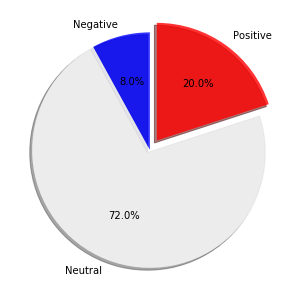

In [12]:
import matplotlib
import matplotlib.pyplot as plt

sizes = [counts['negative'], counts['neutral'], counts['positive']]
explode = (0, 0, 0.1)
labels = 'Negative', 'Neutral', 'Positive'
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, colors="bwr", labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops={'alpha':0.8})
plt.axis('equal') 
plt.show()